In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
bank_data = pd.read_csv('bank-full.csv')

In [3]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
#figuring out the number of unique values within the data frame to spot the inconsistencies
for num, index in enumerate(bank_data.columns):
    if index not in ['age','balance','day','duration']:
        print(index,"\n",bank_data[index].value_counts(),"\n")

job 
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
 no     44396
yes      815
Name: default, dtype: int64 

housing 
 yes    25130
no     20081
Name: housing, dtype: int64 

loan 
 no     37967
yes     7244
Name: loan, dtype: int64 

contact 
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

campaign 

In [7]:
#dropping the unknown from the job
bank_data.drop(bank_data[bank_data['job'] == 'unknown'].index,inplace=True)

In [8]:
#replacing the unknown in contact as cellular
bank_data['contact'].replace(['unknown'],'cellular',inplace=True)

In [9]:
#replacing the unknown in education as secondary
bank_data['education'].replace(['unknown'],'secondary',inplace=True)

In [10]:
#dropping the feature named 'poutcome' as it has majority of 'unknown'
bank_data.drop(columns='poutcome',inplace=True) 

In [11]:
cleanup_cols = {'marital':{'single':1,
                            'married':2,
                            'divorced':0},
                'education':{'primary':0,
                                'secondary':1,
                                'tertiary':2},
                'default':{'no':0,
                            'yes':1},
                'housing':{'no':0,
                            'yes':1},
                'loan':{'no':0,
                        'yes':1},
                'contact':{'cellular':0,
                            'telephone':1},
                'Target':{'yes':1,
                            'no':0}}

In [12]:
bank_data.replace(cleanup_cols,inplace=True)

In [13]:
bank_data.dtypes

age           int64
job          object
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
Target        int64
dtype: object

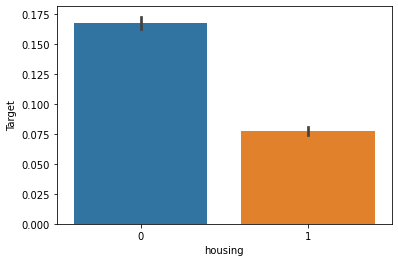

In [14]:
sns.barplot(x=bank_data['housing'],y=bank_data['Target'], data=bank_data)

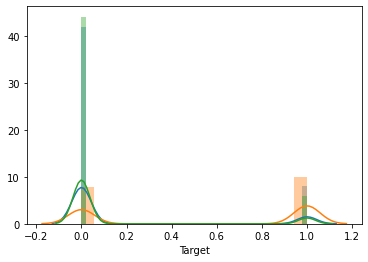

In [15]:
sns.distplot(bank_data['loan'])
sns.distplot(bank_data['housing'])
sns.distplot(bank_data['Target'])

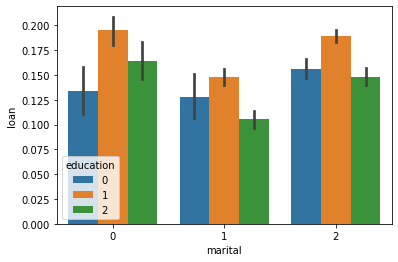

In [16]:
sns.barplot(x=bank_data['marital'],y=bank_data['loan'],data=bank_data,hue=bank_data['education'])

In [17]:
#Calculating and visualizing the number of people opted and didn't opt for Term Deposit based on the job category 

job = bank_data.groupby(['job','Target'])

[Text(0, 0.5, 'Number of cases')]

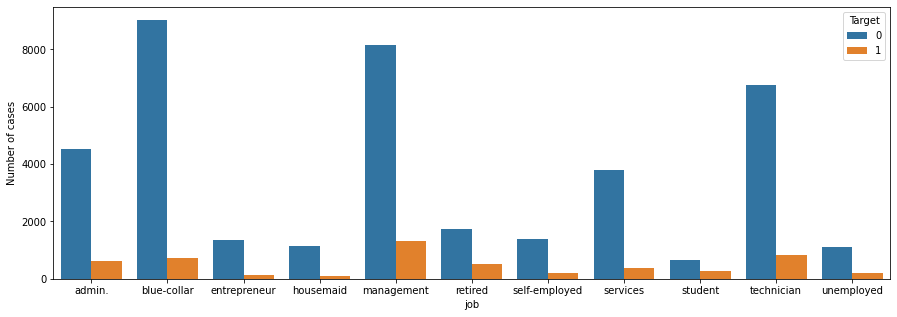

In [18]:
job = pd.DataFrame(job['age'].count()).reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(x='job',y='age',hue='Target',data=job)
ax.set(ylabel='Number of cases')


In [19]:
bank_data.dtypes

age           int64
job          object
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
Target        int64
dtype: object

In [20]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,2,2,0,2143,1,0,0,5,may,261,1,-1,0,0
1,44,technician,1,1,0,29,1,0,0,5,may,151,1,-1,0,0
2,33,entrepreneur,2,1,0,2,1,1,0,5,may,76,1,-1,0,0
3,47,blue-collar,2,1,0,1506,1,0,0,5,may,92,1,-1,0,0
5,35,management,2,2,0,231,1,0,0,5,may,139,1,-1,0,0


In [21]:
#creating dummy variables
bank_data_dummies = bank_data.copy()
bank_data_dummies = pd.get_dummies(data=bank_data_dummies,columns=['marital','education','loan','default','housing','job','month','contact'],drop_first=True,prefix_sep='_')

In [22]:
#Splitting of the data in 70 30 ratio
x = bank_data_dummies.drop('Target',axis=1)
y = bank_data_dummies['Target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [23]:
#Logistic Regression model and their coeeficient values
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0         1         2         3         4         5         6  \
0 -0.00208  0.000015  0.002258  0.004025 -0.117534  0.002107  0.062859   

          7         8         9  ...        27        28        29        30  \
0  0.067846 -0.229187  0.123942  ... -1.226086 -0.833732 -0.655264  1.496206   

         31        32        33       34       35  intercept  
0 -1.040046 -0.853147  0.815356  0.88073 -0.10193  -2.035651  

[1 rows x 37 columns]


In [24]:
#Model Score
model_score = model.score(x_test, y_test)
print(model_score)

0.8918156859835275


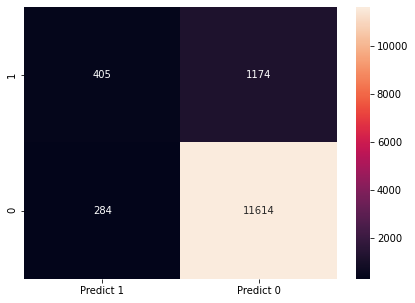

In [25]:
#Confusion matrix and heatmap

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [26]:
#Dataframe of Confusion Matrix
df_lr = pd.DataFrame([{'accuracy':metrics.accuracy_score(y_test,y_predict),
                    'precision':metrics.precision_score(y_test,y_predict),
                    'recall':metrics.recall_score(y_test,y_predict),
                    }])

In [27]:
#Precision, recall, F1 Score from Logistic Regression
print(metrics.precision_score(y_test,y_predict))
print(metrics.recall_score(y_test,y_predict))
print(metrics.f1_score(y_test,y_predict))

0.5878084179970973
0.2564914502849905
0.35714285714285715


In [28]:
#Decision Tree Algo 
tree_classifier = DecisionTreeClassifier()
tree_classifier = tree_classifier.fit(x_train,y_train)

In [29]:
tree_predict = tree_classifier.predict(x_test)

In [30]:
print(metrics.accuracy_score(y_test,tree_predict))
print(metrics.precision_score(y_test,tree_predict))
print(metrics.recall_score(y_test,tree_predict))
print(metrics.f1_score(y_test,tree_predict))
df_decision_tree = pd.DataFrame([{'accuracy':metrics.accuracy_score(y_test,tree_predict),
                    'precision':metrics.precision_score(y_test,tree_predict),
                    'recall':metrics.recall_score(y_test,tree_predict),
                    }])

0.8680715292720932
0.4365838113448056
0.4338188727042432
0.4351969504447268


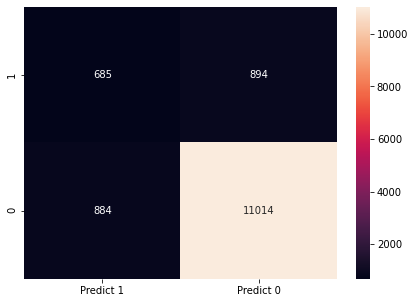

In [31]:
#Confusion Matrix using the desicion tree
cm=metrics.confusion_matrix(y_test, tree_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [32]:
#Using the Emsemble technique: 
    #   Bagging Classifier 
bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.8967129183052608


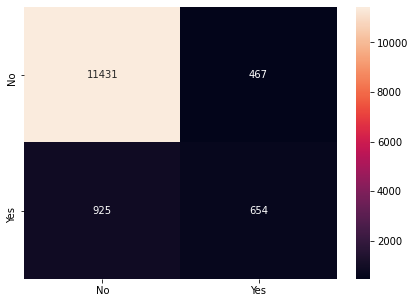

In [33]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [34]:
df_bagging = pd.DataFrame([{'accuracy':metrics.accuracy_score(y_test,y_predict),
                    'precision':metrics.precision_score(y_test,y_predict),
                    'recall':metrics.recall_score(y_test,y_predict),
                    }])

In [35]:
#Using the Emsemble technique: 
        # Boosting
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8859538472953922


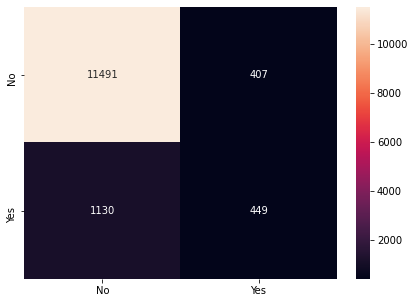

In [36]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [37]:
df_boosting = pd.DataFrame([{'accuracy':metrics.accuracy_score(y_test,y_predict),
                    'precision':metrics.precision_score(y_test,y_predict),
                    'recall':metrics.recall_score(y_test,y_predict),
                    }])

In [38]:
#Using the Emsemble technique: 
        # Random Forest
random_forest = RandomForestClassifier(n_estimators = 20, random_state = 1)
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=1)

0.8957483119388588


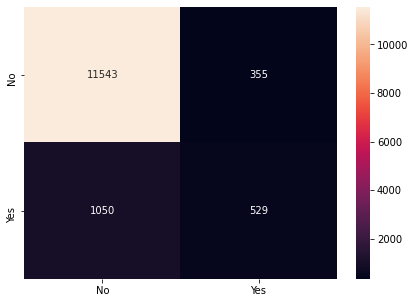

In [39]:
y_predict = random_forest.predict(x_test)
print(random_forest.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [40]:
df_random_forest = pd.DataFrame([{'accuracy':metrics.accuracy_score(y_test,y_predict),
                    'precision':metrics.precision_score(y_test,y_predict),
                    'recall':metrics.recall_score(y_test,y_predict),
                    }])

In [41]:
index_nm = ['Bagging','Boosting','Decision Tree','Logistic Regression','Random Forest']
combined_model = pd.concat([df_bagging,df_boosting,df_decision_tree,df_lr,df_random_forest],axis=0,ignore_index=True)
combined_model['Model Name'] = index_nm
combined_model.set_index('Model Name')

,accuracy,precision,recall
Model Name,,,
Bagging,0.896713,0.583408,0.414186
Boosting,0.885954,0.524533,0.284357
Decision Tree,0.868072,0.436584,0.433819
Logistic Regression,0.891816,0.587808,0.256491
Random Forest,0.895748,0.598416,0.335022


In [42]:
#Based on the metrics we have, Boosting and Random Forest are the best models to choose. Among them Bagging seems to be the best as the Recall score for that looks better than the Random Forest